In [84]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import csv
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow import keras,nn

## Read train and test csv

In [85]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [86]:
print(df_train.shape)

(42000, 785)


In [87]:
print(df_train.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [88]:
print(df_train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [89]:
Y_train = df_train.iloc[:,0]           # Spliting the labels of train dataset
X_train = df_train.iloc[:,1:]          # Spliting the features of train dataset

In [90]:
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [91]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Creating Numpy arrays
Y = Y_train.values      
X = X_train.values

In [93]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [94]:
Y

array([1, 0, 1, ..., 7, 6, 9])

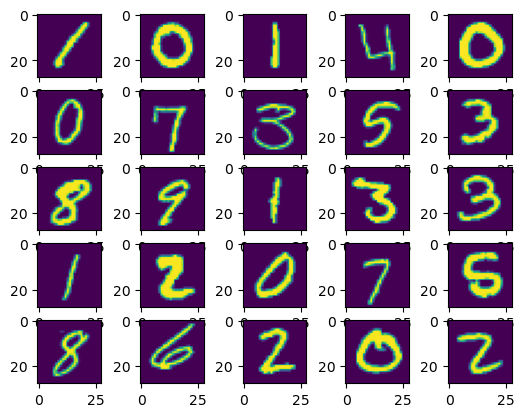

In [95]:
# Visualizing the data
for i in range(25):
    plt.subplot(5,5, i+1)
    image = X[i,:]
    image_shape = (28, 28)
    image = image.reshape(image_shape)

    plt.imshow(image)

In [96]:
print(Y.shape)
print(X.shape)

(42000,)
(42000, 784)


In [105]:
#Build the model
model = keras.models.Sequential([layers.Flatten(),
                    layers.Dense(512, activation = 'relu', input_shape = (28,28)),
                    layers.Dense(256,activation = 'relu'),
                    layers.Dense(128,activation = 'relu'),
                    layers.Dense(64,activation = 'relu'),
                    layers.Dense(32,activation = 'relu'),
                    layers.Dense(32,activation = 'relu'),
                    layers.Dense(10,activation = 'softmax'),    
])

In [98]:
# Model 2
model = keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

X = X.reshape(-1, 28, 28, 1)

In [106]:
# Defining loss function and optimizer
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [107]:
# Training the model
model.fit(X, Y, batch_size = 64, epochs = 20)

Epoch 1/20
657/657 [==============================] - 5s 6ms/step - loss: 0.8392 - accuracy: 0.8726
Epoch 2/20
657/657 [==============================] - 4s 6ms/step - loss: 0.1719 - accuracy: 0.9516
Epoch 3/20
657/657 [==============================] - 4s 6ms/step - loss: 0.1231 - accuracy: 0.9632
Epoch 4/20
657/657 [==============================] - 4s 6ms/step - loss: 0.1008 - accuracy: 0.9697
Epoch 5/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0877 - accuracy: 0.9742
Epoch 6/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0817 - accuracy: 0.9768
Epoch 7/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0768 - accuracy: 0.9778
Epoch 8/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0675 - accuracy: 0.9802
Epoch 9/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0608 - accuracy: 0.9825
Epoch 10/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0584 - accuracy: 0.9831

In [108]:
df_test.shape

(28000, 784)

In [109]:
df_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [110]:
# Taking the values of test set to an array
x = df_test
#x = x.values
#x = x.reshape(-1, 28, 28, 1)

In [111]:
# Predicting the labels for the test set
predict = model.predict(x)

875/875 [==============================] - 2s 2ms/step


In [112]:
predict.shape

(28000, 10)

In [113]:
predicted_labels = predict.argmax(axis=1)

In [114]:
predicted_labels

array([2, 0, 9, ..., 3, 9, 2])

## Creating the output csv file

In [115]:
template_file_path = '/kaggle/input/digit-recognizer/sample_submission.csv'
output_file_path = '/kaggle/working/output.csv'

with open(template_file_path, 'r') as template_csv:
    template_reader = csv.reader(template_csv)
    next(template_reader)  # Skip header

    updated_rows = []
    for row, label in zip(template_reader, predicted_labels):
        row[1] = label  # Update the label column
        updated_rows.append(row)

# Write updated rows to the output CSV file
with open(output_file_path, 'w', newline='') as output_csv:
    csvwriter = csv.writer(output_csv)
    csvwriter.writerow(['ImageId', 'Label'])  # Write header
    csvwriter.writerows(updated_rows)

print("Predicted labels saved to output.csv")

Predicted labels saved to output.csv
